# Implementing and comparing several pitch detection methods on sample files

For simplicity I am using the Anaconda distribution on my Macbook Pro for this notebook. 

The purpose is to first experiment here with sample WAV files. Each file comes from a database of free samples provided free of rights by the Philharmonia Orchestra at [http://www.philharmonia.co.uk/explore/sound_samples/](http://www.philharmonia.co.uk/explore/sound_samples/).

We will use 6 samples representing a long Forte string pick of each of the 6 strings of an accoustic guitar tuned in Standard E.

Note: I have converted the sample files myself from their original mp3 format to wav format with 32bit, 44100Hz and mono channel.

We will use two different methods for detecting the pitch and compare their results.

For reference, here is the list of frequencies of all 6 strings expected for a well tuned guitar:


String	| Frequency	| Scientific pitch notation | Sample
--- | --- | --- | ---
1 (E) | 329.63 Hz | E4 | [Sample file](samples/guitar_E2_very-long_forte_normal.wav)
2 (B) |	246.94 Hz | B3 | [Sample file](samples/guitar_A2_very-long_forte_normal.wav)
3 (G) |	196.00 Hz |	G3 | [Sample file](samples/guitar_D3_very-long_forte_normal.wav)
4 (D) |	146.83 Hz |	D3 | [Sample file](samples/guitar_G3_very-long_forte_normal.wav)
5 (A) | 110.00 Hz | A2 | [Sample file](samples/guitar_B3_very-long_forte_normal.wav)
6 (E) | 82.41 Hz | E2 | [Sample file](samples/guitar_E4_very-long_forte_normal.wav)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

/Users/bastien/dev/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


**We will use scipy from the Anaconda distribution to read the WAV sample files**

In [24]:
from scipy.io import wavfile

# Let's start with the first sample corresponding to the lower string E2
rate, myrecording = wavfile.read("samples/guitar_E2_very-long_forte_normal.wav")
print(rate, np_array.size)

(44100, 208512)


**We define the length we want to record in seconds and the sampling rate to the source file sample rate (44100 Hz)**

In [12]:
duration = 1  # seconds
fs = rate    # samples by second

In [33]:
# Let's restrict our sample to 1 second of the recording, after 0.5 second of sound to avoid the string picking
array = myrecording[int(0.5*fs):int(2.5*fs)]
print(array.size)

66150


**Let's plot a section of this array to look at it first**

We notice a pretty periodic signal with a clear fundamental frequency: which makes sense since a guitar string vibrates producing an almost purely sinuzoidal wave

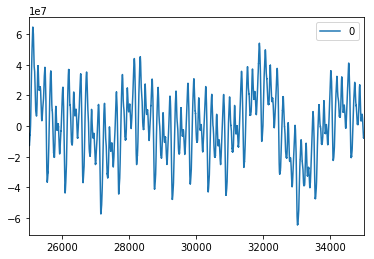

In [34]:
df = pd.DataFrame(array)
df.loc[25000:35000].plot()

## First method: Naive pitch detection using Fast Fourier Transform

One first naive idea would be to "simply" take the (discrete) Fourier transform of the signal to find the fundamental frequency of the recording.

Let's try that out and see what result we get.

#### We use numpy to compute the discrete Fourier transform of the signal:

In [35]:
fourier = np.fft.fft(array)

We can visualise a section of the Fourier transform to notice there is a clear fundamental frequency:

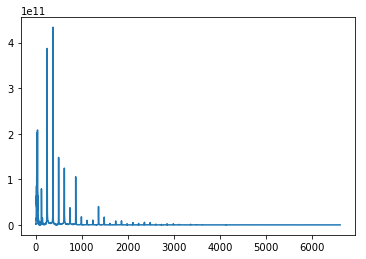

In [36]:
plt.plot(abs(fourier[:len(fourier)/10]))

We notice already things are not going to be that easy. There are different harmonics picked here, and 2 of the most important ones are comparable in amplitude. 

We find the frequency corresponding to the maximum of this Fourier transform, and calculate the corresponding real frequency by re-multiplying by the sampling rate

In [37]:
f_max_index = np.argmax(abs(fourier[:fourier.size/2]))
freqs = np.fft.fftfreq(len(fourier))
freqs[f_max_index]*fs

248.0

**This method detects a fundamental frequency of 248Hz, which is wrong.**

We notice that as suspected by looking at the chart of the Fourier transform, the 3rd harmonic of the expected fundamental is detected with this naive method: 248.5 = 3 x 82.41, where 82.41Hz was the expected fundamental frequency for this sample of the E2 note.


## Taking the convolution of the sample and a Hamming window before applying FFT

One traditional way to deal with this is issue is to first convolute the sample with a window function, such as the [Hamming window](https://en.wikipedia.org/wiki/Window_function#Hamming_window)

In [51]:
# Work in progress: coming soon

-------

## WIP: Using Autocorrelation method for pitch detection

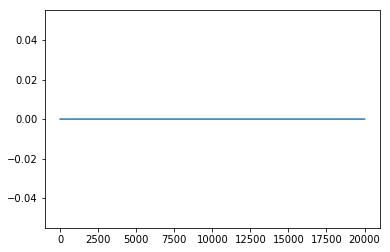

In [50]:
rec = array
rec = rec[15000:35000]
autocorr = np.correlate(rec, rec, mode='same')
plt.plot(autocorr)